### 梯度下降算法

#### 0.引入依赖

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.导入数据（data.csv)

In [30]:
points = np.genfromtxt('data.csv',delimiter=',')

points

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

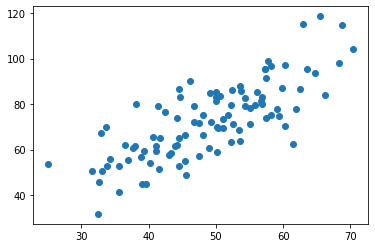

In [31]:
#提取points中的两列数据，分别作为x，y
x = points[:,0]
y = points[:,1]

#用plt画出散点图
plt.scatter(x,y)
plt.show()

#### 2.定义损失函数

In [32]:
#损失函数是系数的函数，另外还要传入数据的x,y
def compute_cost(w,b,points):
    total_cost = 0
    M = len(points)
    
    #逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost += ( y- w * x - b) ** 2
    
    return total_cost/M

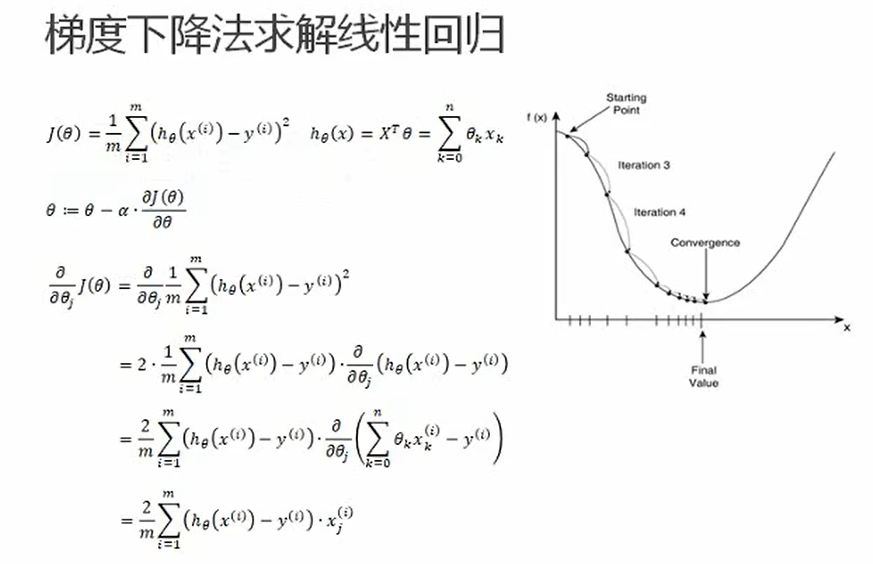

#### 3.定义模型的超参数(可调）

In [33]:
alpha = 0.0001
initial_w = 0
initial_b = 0
num_iter = 10

#### 4.定义核心梯度下降算法函数
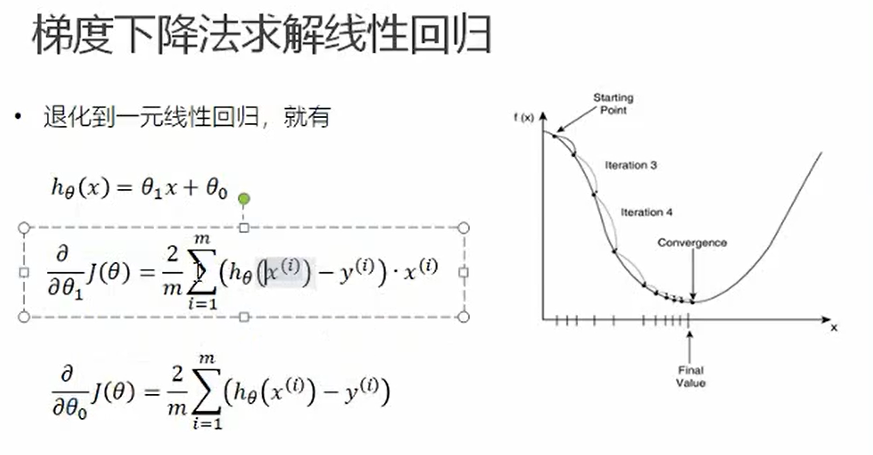

In [34]:
def grad_desc(points,initial_w,initial_b,alpha,num_iter):
    w = initial_w
    b = initial_b
    #定义一个list保存所有的损失函数值，用来显示下降的过程
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points))
        w,b = step_grad_desc(w,b,alpha,points)
        
    return [w,b,cost_list]

def step_grad_desc(current_w, current_b, alpha, points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    #对每个点代入公式求和
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_grad_w += ( current_w * x +current_b - y)*x
        sum_grad_b += current_w * x +current_b -y
        
    #用公式求当前梯度
    grad_w = 2/M *sum_grad_w
    grad_b =2/M * sum_grad_b
    
    #梯度下降，更新当前的w和b
    updated_w = current_w - alpha * grad_w
    updated_b =current_b - alpha * grad_b
    
    return updated_w,updated_b

#### 5.测试，运行梯度下降算法计算最优的w和b

w is: 1.4774173755483797
b is: 0.02963934787473238
cost is: 112.65585181499748


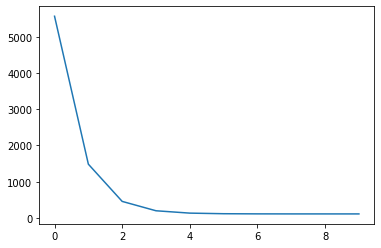

In [36]:
w, b, cost_list = grad_desc(points,initial_w,initial_b,alpha,num_iter)

print("w is:",w)
print("b is:",b)

cost = compute_cost(w,b,points)
print("cost is:",cost)
plt.plot(cost_list)
plt.show()

#### 6.画出拟合曲线

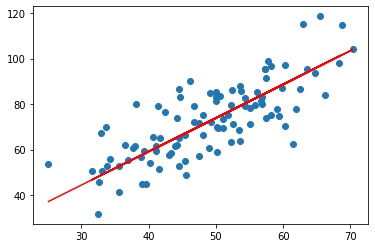

In [38]:
plt.scatter(x,y)
#针对每一个x,计算出预测的y值
pred_y = w * x +b

plt.plot(x,pred_y,c='r')
plt.show()